<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


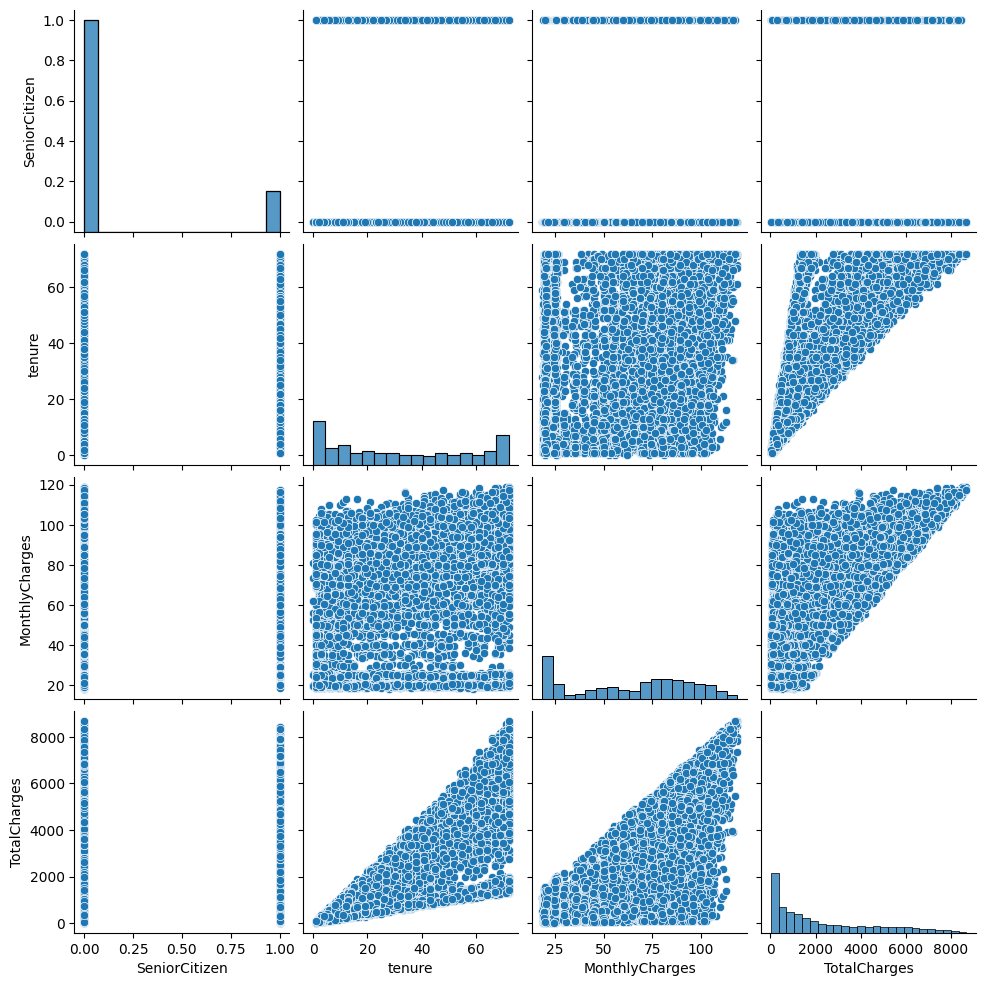

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Load data
data = pd.read_csv('Customer_Churn_Prediction.csv')

# Basic exploration
print(data.info())
print(data.describe())
sns.pairplot(data)
plt.show()

In [4]:
import pandas as pd

# Load data
data = pd.read_csv('Customer_Churn_Prediction.csv')

# Impute missing values by assigning the result back to the DataFrame
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

# Impute missing values using the recommended method
data.fillna({'TotalCharges': data['TotalCharges'].mean()}, inplace=True)

In [5]:
import pandas as pd

# Load data
data = pd.read_csv('Customer_Churn_Prediction.csv')

# Check for missing values
print(data.isnull().sum())

# Ensure the column exists before imputation
if 'TotalCharges' in data.columns:
    data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)
else:
    print("Column 'TotalCharges' does not exist in the DataFrame")


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_13452\1538022033.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('Customer_Churn_Prediction.csv')

# Handle missing values
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

# Feature engineering: Create tenure groups
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 year'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 48:
        return '2-4 years'
    elif tenure <= 60:
        return '4-5 years'
    else:
        return '5+ years'

data['tenure_group'] = data['tenure'].apply(tenure_group)

# Drop the 'customerID' column since it's non-numeric
data = data.drop(columns=['customerID'])

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                             'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                             'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                                             'PaperlessBilling', 'PaymentMethod', 'tenure_group'])

# Convert 'Churn' column to numeric
data_encoded['Churn'] = data_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(data_encoded.drop(columns='Churn'))
y = data_encoded['Churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Optionally, you can also get the predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Output the predicted values
print(f'Predicted values: {y_pred}')
print(f'Predicted probabilities: {y_prob}')


Predicted values: [1 0 0 ... 0 0 0]
Predicted probabilities: [0.67400695 0.06604921 0.00728366 ... 0.00839336 0.43483289 0.15796477]


In [12]:
import pandas as pd

# Create a DataFrame with the actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability': y_prob})

# Save the DataFrame to a CSV file
results.to_csv('predicted_results.csv', index=False)


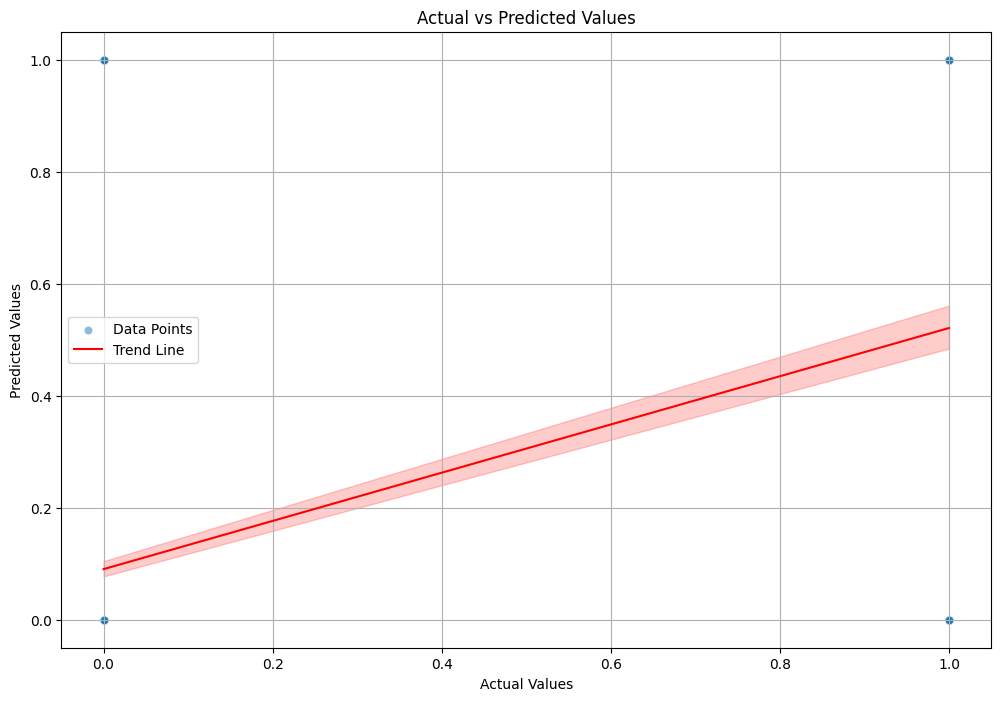

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming y_test and y_pred are your actual and predicted values
# Create a DataFrame with the actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the actual vs predicted values
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Actual', y='Predicted', data=results, alpha=0.5, label='Data Points')
sns.lineplot(x='Actual', y='Predicted', data=results, color='red', label='Trend Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Evaluate the model using appropriate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.804070042593469
Precision: 0.682648401826484
Recall: 0.5209059233449478
F1 Score: 0.5909090909090909
Confusion Matrix:
[[1400  139]
 [ 275  299]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.52      0.59       574

    accuracy                           0.80      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



In [1]:
from sklearn.metrics import classification_report, roc_auc_score

# Assuming y_test contains actual values and y_pred contains predicted labels
print(classification_report(y_test, y_pred))

# Compute AUC-ROC
auc_roc = roc_auc_score(y_test, y_proba[:, 1])  # Use probability scores for positive class
print(f"AUC-ROC Score: {auc_roc:.4f}")


NameError: name 'y_test' is not defined

In [3]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Example data (replace this with your actual data)
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.randint(0, 2, size=100)  # 100 samples, binary target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (replace with your model and parameters)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Compute AUC-ROC
auc_roc = roc_auc_score(y_test, y_proba[:, 1])  # Use probability scores for the positive class
print("AUC-ROC:", auc_roc)


              precision    recall  f1-score   support

           0       0.71      0.45      0.56        11
           1       0.54      0.78      0.64         9

    accuracy                           0.60        20
   macro avg       0.63      0.62      0.60        20
weighted avg       0.64      0.60      0.59        20

AUC-ROC: 0.5353535353535354


TO improve model

In [8]:
import pandas as pd

# Replace 'Customer_Churn_Prediction.csv' with your actual file path
data = pd.read_csv('Customer_Churn_Prediction.csv')


In [9]:
# Average Monthly Charges
data['average_monthly_charges'] = data['TotalCharges'] / (data['tenure'] + 1)  # Avoid division by zero

# Number of Services Used
data['num_services'] = (
    data[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]
    .apply(lambda x: sum(x == 'Yes'), axis=1)
)

# Encode Categorical Variables
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data['MultipleLines'] = data['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})
data['InternetService'] = data['InternetService'].map({'DSL': 1, 'Fiber optic': 2, 'No': 0})
data['OnlineSecurity'] = data['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['OnlineBackup'] = data['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['DeviceProtection'] = data['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['TechSupport'] = data['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['StreamingTV'] = data['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['StreamingMovies'] = data['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['Contract'] = data['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
data['PaymentMethod'] = data['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Display the first few rows of the DataFrame to check the new features
print(data.head())


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE       0              0        0           0      34   
2  3668-QPYBK       0              0        0           0       2   
3  7795-CFOCW       0              0        0           0      45   
4  9237-HQITU       1              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              0                1               0  ...   
1             1              0                1               1  ...   
2             1              0                1               1  ...   
3             0              0                1               1  ...   
4             1              0                2               0  ...   

   StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
0            0                0         0                 1              0

In [10]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba[:, 1]))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

AUC-ROC: 0.8369075222292381


In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Grid Search Parameters:", best_params)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Grid Search Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Load your dataset
data = pd.read_csv('Customer_Churn_Prediction.csv')

# Feature Engineering
data['average_monthly_charges'] = data['TotalCharges'] / (data['tenure'] + 1)  # Avoid division by zero
data['num_services'] = (
    data[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]
    .apply(lambda x: sum(x == 'Yes'), axis=1)
)

# Encode Categorical Variables
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data['MultipleLines'] = data['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})
data['InternetService'] = data['InternetService'].map({'DSL': 1, 'Fiber optic': 2, 'No': 0})
data['OnlineSecurity'] = data['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['OnlineBackup'] = data['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['DeviceProtection'] = data['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['TechSupport'] = data['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['StreamingTV'] = data['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['StreamingMovies'] = data['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
data['Contract'] = data['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
data['PaymentMethod'] = data['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Features and target variable
X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute Missing Values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train_imputed, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_imputed)
y_proba = model.predict_proba(X_test_imputed)

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba[:, 1]))


              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.80      0.81      0.81      1409

AUC-ROC: 0.8627415715217324


c:\Users\Admin\Desktop\Nikita Project\Titanic - ML\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
model = LogisticRegression(random_state=42, max_iter=500)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba[:, 1]))

model = LogisticRegression(random_state=42, solver='saga', max_iter=200)




              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

AUC-ROC: 0.861807374206838


model shows a slight improvement with an accuracy of 82% and an AUC-ROC score of 0.86, which indicates a good performance in distinguishing between churners and non-churners.

In [22]:
import pandas as pd

# Create a DataFrame with the prediction results
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability': y_proba[:, 1]  # Probability of being in class 1 (Churn)
})

# Save the DataFrame to a CSV file
results.to_csv('churn_predictions.csv', index=False)

print("Prediction values have been saved to churn_predictions.csv")


Prediction values have been saved to churn_predictions.csv


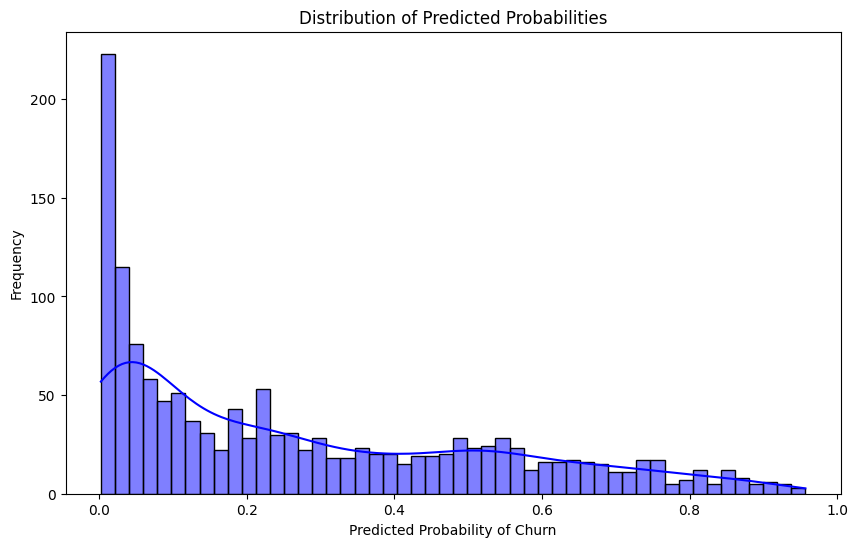

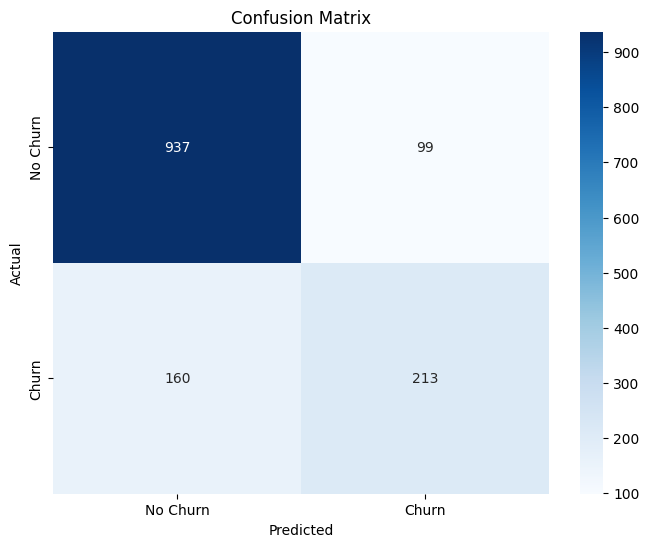

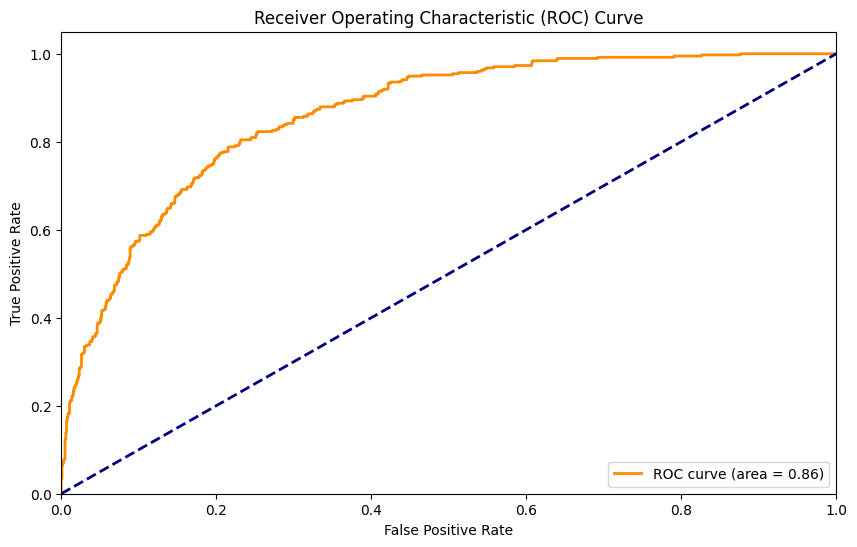

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(results['Probability'], bins=50, kde=True, color='blue')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Churn')
plt.ylabel('Frequency')
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
